In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('telco.csv')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [41]:
df.shape

(7049, 13)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [44]:
df = df.dropna()
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


#### Step 1: Understand your data?
- Data format?
- Missing data?
- Outliers?

#### Step 2: What is my aim?
- Discover drivers of Churn?
- Why do we care about the Churn?


#### Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)

- Higher monthly charges leads to higher churn?
- Non-senior citizens churn at higher rate
- More the services, less the churn?

- Exploratory question?
 - How is churn differnt by service type?
 - How is churn different by Contract type?
 - How is churn different by payment type?

In [46]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [49]:
df['internet_service'] = df.internet_service.replace([0,1,2], ['No_internet', 'DSL', 'Fiber'])

In [50]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,DSL,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,DSL,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.9,267.40,Yes,3.2


In [51]:
df.internet_service.value_counts()

Fiber          3098
DSL            2417
No_internet    1523
Name: internet_service, dtype: int64

In [ ]:
# What datatype is your target variable? Churn = Categorical
# Numeric continous variables: monthly_charges, total_charges, tenure
# categorical variables: 

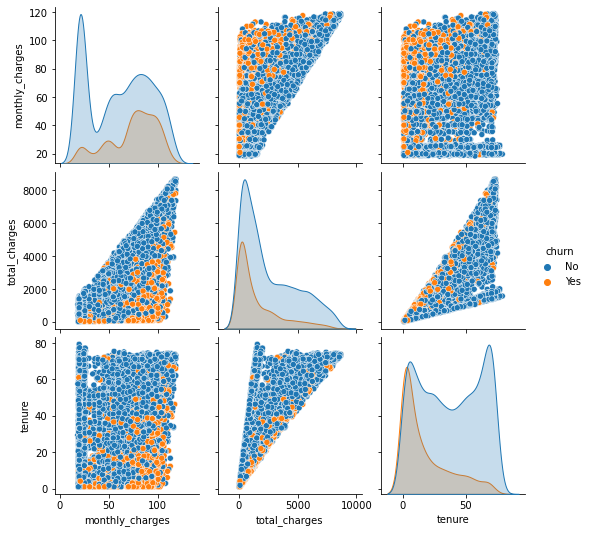

In [53]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [56]:
# mean monthly charges for customers who churn vs who don't churn?

df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

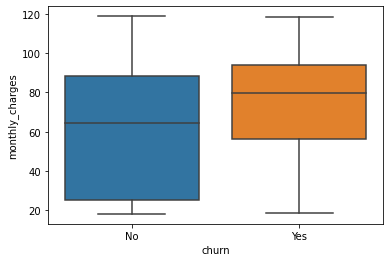

In [57]:
sns.boxplot(data = df, y = 'monthly_charges', x = 'churn')

In [69]:
# categorical vs categorical 

pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


In [63]:
ctab_contract_type = pd.crosstab(df.contract_type, df.churn, normalize='index')
ctab_contract_type

churn,No,Yes
contract_type,,
0,0.572755,0.427245
1,0.887458,0.112542
2,0.971547,0.028453


<AxesSubplot:xlabel='contract_type'>

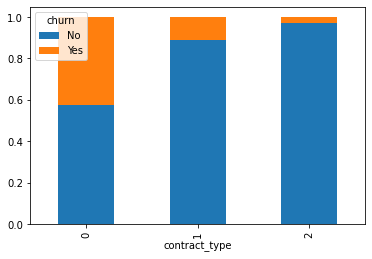

In [65]:
ctab_contract_type.plot(kind = 'bar', stacked = True)

In [66]:
pd.crosstab(df.is_senior_citizen, df.churn)

churn,No,Yes
is_senior_citizen,,
0,4502,1394
1,666,476


In [67]:
pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')

churn,No,Yes
is_senior_citizen,,
0,0.763569,0.236431
1,0.583187,0.416813


In [ ]:
# churn rate vs tenure